# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [71]:
# Libraries for reading and manipulating data
import pandas as pd
import numpy as np

# Libaries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from seaborn.axisgrid import Grid

# To help build prediction models
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [72]:
data = pd.read_csv('ExtraaLearn.csv')

## Data Overview

- Observations
- Sanity checks

In [73]:
data.shape

(4612, 15)

- The dataset has **4612 rows and 15 columns**

In [74]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [75]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observation**
- This indicates that there are 0 non-null inputs in our dataset.

In [77]:
# Numerical columns
num_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'status']

# Categorical columns
cat_cols = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

## Exploratory Data Analysis (EDA)

## Data Preprocessing

In [78]:
# Check percent of missing values in each column
pd.DataFrame(data={'% of Missing Values':round(data.isna().sum()/data.isna().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

,% of Missing Values
ID,0.0
age,0.0
current_occupation,0.0
first_interaction,0.0
profile_completed,0.0
website_visits,0.0
time_spent_on_website,0.0
page_views_per_visit,0.0
last_activity,0.0
print_media_type1,0.0


In [79]:
# Unique values in each column
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

**Observations**
- Checks each category to count how many unique values exist in each column.
- Since there are 4612 unique ID values, and our dataset has exactly 4612 inputs, that means there are no repeated ID values, which is expected.
    - This means it is likely a useless value for our purposes.

In [80]:
# Checking for duplicate values in the data
data.duplicated().sum()

0

**Checks**
- Before removing the ID column, I want to check if there are any duplicate inputs that may need to be removed. 
    - There are none, hence the 0 value.

In [81]:
# Dropping ID column
data.drop(columns='ID',inplace=True)

In [82]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


**Observations**
- The average age of the dataset is 46 years old, and the range of ages is from 18 to 63, indicating **there are only adults; however, there are primarily middle aged people.**
- On average, a person visits the website 3 times, and it seems there is a high outlier of 30 visits. Some don't visit at all.
- The time spent on the website has an average of 724 minutes, but the standard deviation is extremely high, being 743. **This tells us that the data for time spent on the website is very spread out from the mean.** 
- On each website visit, there is an average of 3 different pages they visit within the website. 
- The amount of people who convert to paying customers is 29% of people.

In [83]:
# Printing the number of occurrences of each unique value in each categorical column
for column in cat_cols:
    print(data[column].value_counts(1))
    print("-" * 50)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
--------------------------------------------------
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
--------------------------------------------------
digital_media
No     0.885733
Yes    0.114267
Name: proportion, 

**Observations:**
- The majority of the people are working.
- **There is almost a 50-50 split amongst people using the website or the mobile app for their first interaction,** but the website has 5% more.
- **Most people have completed some or most of their profile;** only less than 3% of people have a low completion level.
- Most people neither saw the company from a newspaper or magazine ad. 
- Most people didn't see the company from digital platforms either. Only 11%.
- Most peopl
- Only 2% of the people had referrals. 

In [84]:
df = data.copy()

## EDA

In [85]:
# Defining the hist_box() function
def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part
    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist)
    plt.show()

In [86]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

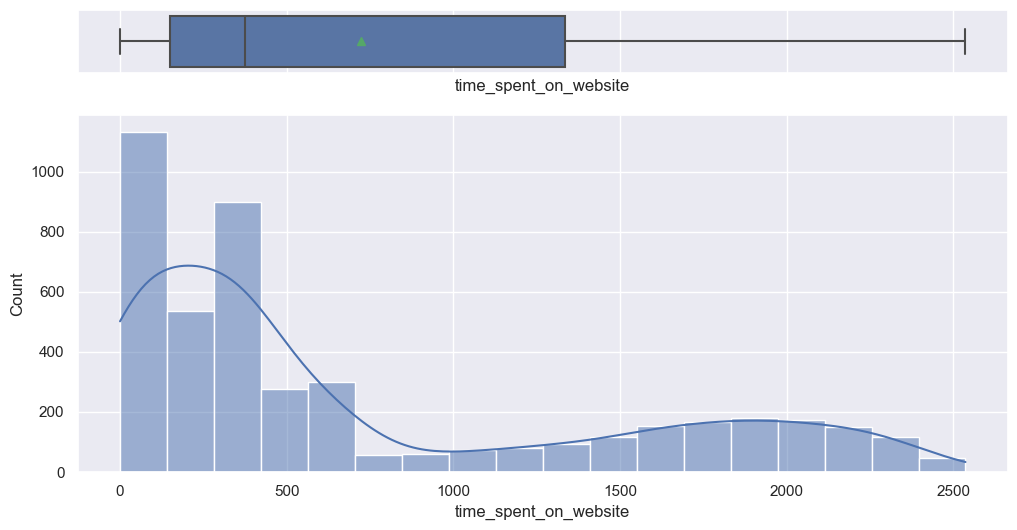

In [87]:
hist_box(df, 'time_spent_on_website')

**Observations:**
- **The majority of the time spent on website is between about 0 and 700 minutes.** 
- There is a slight right skew on the graph.
- The peak is between about 0 and 150.

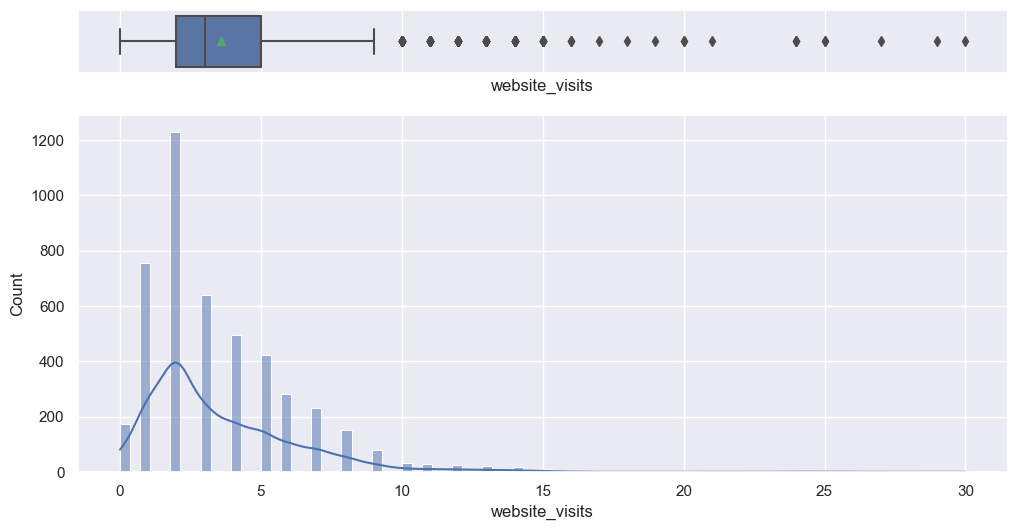

In [88]:
hist_box(df, 'website_visits')

**Observation:**
- **The data is right skewed**, and has the majority of the visits between 0 and 9 visits. 
- There are a decent amount of outliers, however. 

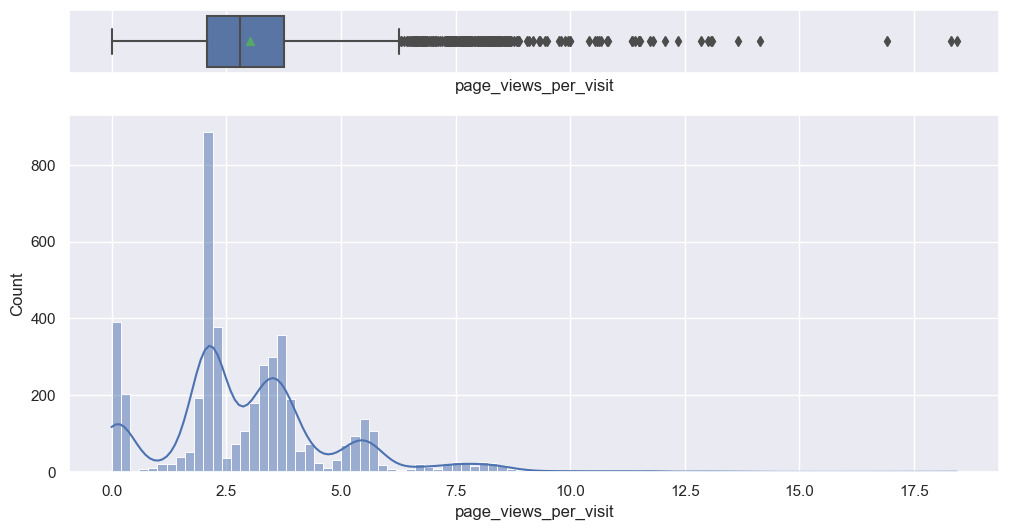

In [89]:
hist_box(df, 'page_views_per_visit')

**Observations:**
- The data is very spread out, and there seems to not be much pattern or consistency in the numbers, illustrated by the graph.
- The main range of data lies between 0 and 7 pages per visit.

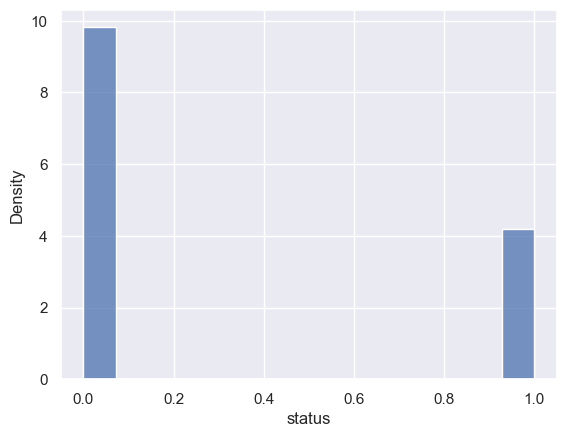

In [90]:
sns.histplot(data=df, x='status', stat="density")
plt.show()

**Observation:**
- Less than half of the data has a positive lead status, meaning the majority of people do not become paying customers.
- **In the whole set of data, there is about a ratio >0.5 in conversion to positive status.**

In [91]:
df.groupby('current_occupation')['status'].value_counts()

current_occupation  status
Professional        0         1687
                    1          929
Student             0          490
                    1           65
Unemployed          0         1058
                    1          383
Name: count, dtype: int64

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


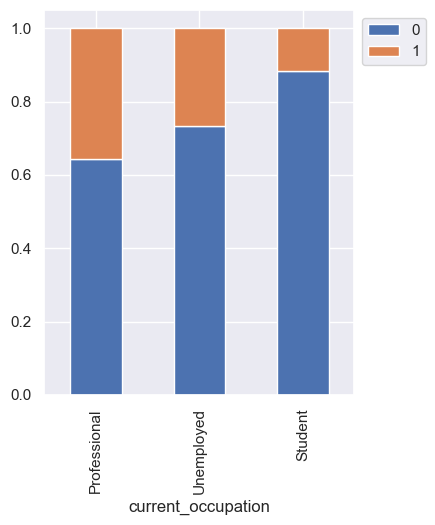

In [92]:
stacked_barplot(df, 'current_occupation', 'status')

**Observations:**
- **People who are currently working, with profesional status, have the highest conversion rate of leading to paid customers.**
- Also important to note that the majority of people in the dataset are working. The second biggest group is the people who are unemployed, and the least large group is the student group.
- In this case, the bigger the group, there also happens to be the larger conversion rate: Professional, unemployed, and student.

In [93]:
df.groupby('first_interaction')['status'].value_counts()

first_interaction  status
Mobile App         0         1852
                   1          218
Website            0         1383
                   1         1159
Name: count, dtype: int64

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


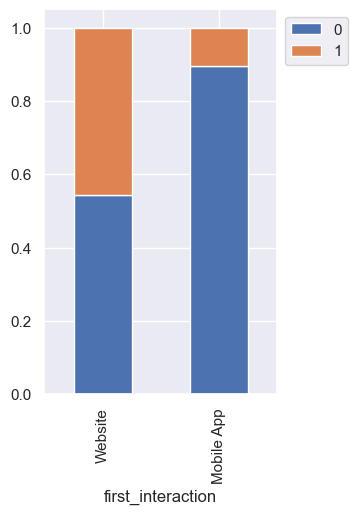

In [94]:
stacked_barplot(df, 'first_interaction', 'status')

**Observations:**
- People who use the **website as their first interaction have a much higher conversion rate to becoming a paying customer, being only just less than 50%.**
- And another thing to note is that **only about 10% of people convert when the mobile app is their first experience.**
- There is about a 50-50 split between people who used the mobile app first or the website as their first interaction. 
- This indicates that the users first interaction does give an important piece of information about whether they become paying customers.

In [95]:
df.groupby('last_activity')['status'].value_counts()

last_activity     status
Email Activity    0         1587
                  1          691
Phone Activity    0          971
                  1          263
Website Activity  0          677
                  1          423
Name: count, dtype: int64

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


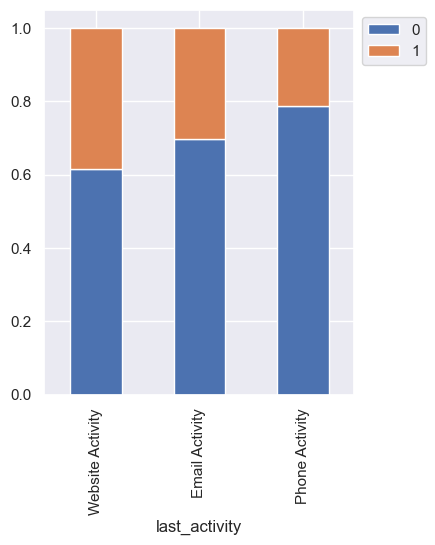

In [96]:
stacked_barplot(df, 'last_activity', 'status')

**Observations:**
- People who last used the website as their last interaction have the highest conversion rate to becoming a lead, being >50%. 
- The majority of people used email as their last interaction, and while emails have the most conversions, the ratio is <50%.
- Prospects whose last interaction was a phone interaction, had the worst conversion rate of around 20%. 
- **Therefore, the best indicator when looking at the last interaction is website activity.**

In [97]:
df.groupby('print_media_type1')['status'].value_counts()

print_media_type1  status
No                 0         2897
                   1         1218
Yes                0          338
                   1          159
Name: count, dtype: int64

In [98]:
print('Did not use media1: ', (1218)/(1218+2897))
print('Used media1: ', (159)/(159+338))

Did not use media1:  0.2959902794653706
Used media1:  0.3199195171026157


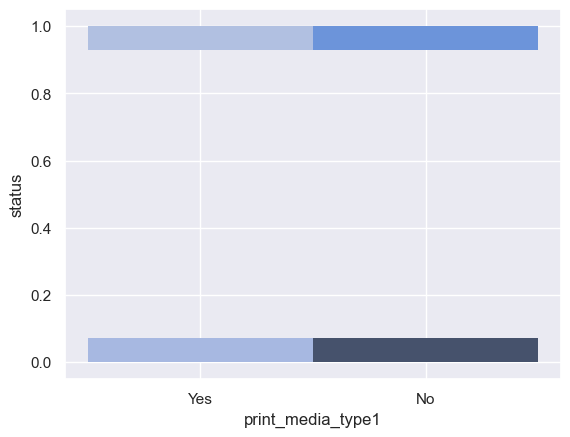

In [99]:
sns.histplot(data=df, x='print_media_type1', y='status')
plt.show()

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


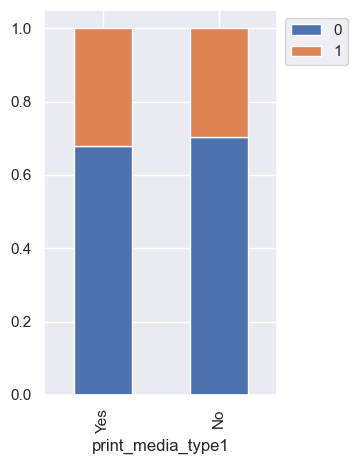

In [100]:
stacked_barplot(df, 'print_media_type1', 'status')

In [101]:
df.groupby('print_media_type2')['status'].value_counts()

print_media_type2  status
No                 0         3077
                   1         1302
Yes                0          158
                   1           75
Name: count, dtype: int64

In [102]:
print('Did not use media2: ', (1302)/(1302+3077))
print('Used media2: ', (75)/(159+75))

Did not use media2:  0.29732815711349625
Used media2:  0.32051282051282054


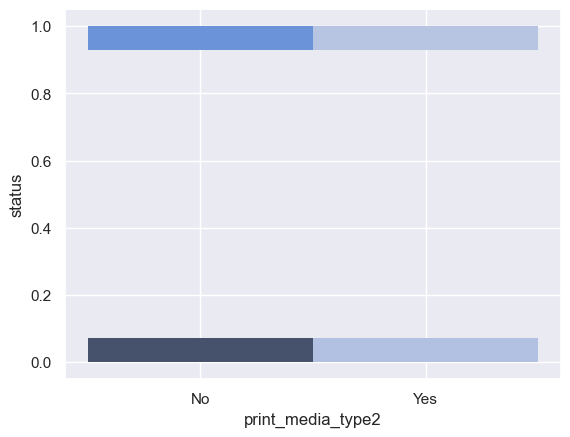

In [103]:
sns.histplot(data=df, x='print_media_type2', y='status')
plt.show()

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


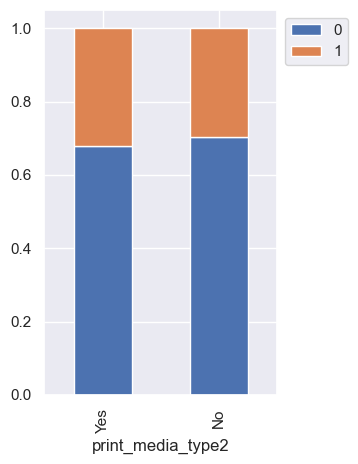

In [104]:
stacked_barplot(df, 'print_media_type2', 'status')

In [105]:
df.groupby('digital_media')['status'].value_counts()

digital_media  status
No             0         2876
               1         1209
Yes            0          359
               1          168
Name: count, dtype: int64

In [106]:
print('Did not use digital media: ', (1209)/(1209+2876))
print('Used digital media: ', (168)/(168+359))

Did not use digital media:  0.29596083231334147
Used digital media:  0.3187855787476281


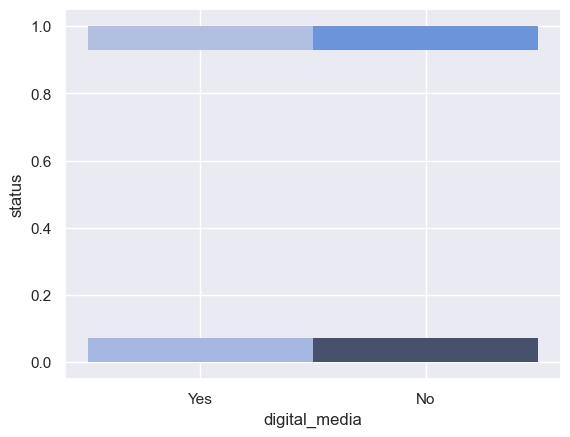

In [107]:
sns.histplot(data=df, x='digital_media', y='status')
plt.show()

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


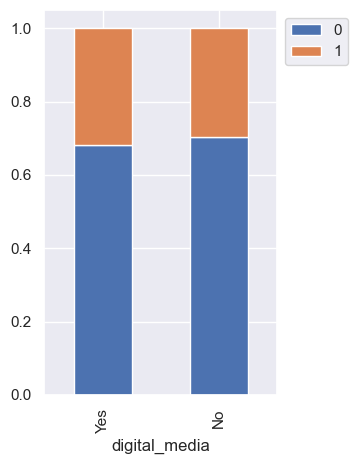

In [108]:
stacked_barplot(df, 'digital_media', 'status')

In [109]:
df.groupby('educational_channels')['status'].value_counts()

educational_channels  status
No                    0         2727
                      1         1180
Yes                   0          508
                      1          197
Name: count, dtype: int64

In [110]:
print('Did not use educational channels: ', (1180)/(1180+2727))
print('Used educational channels: ', (197)/(197+508))

Did not use educational channels:  0.30202201177373944
Used educational channels:  0.2794326241134752


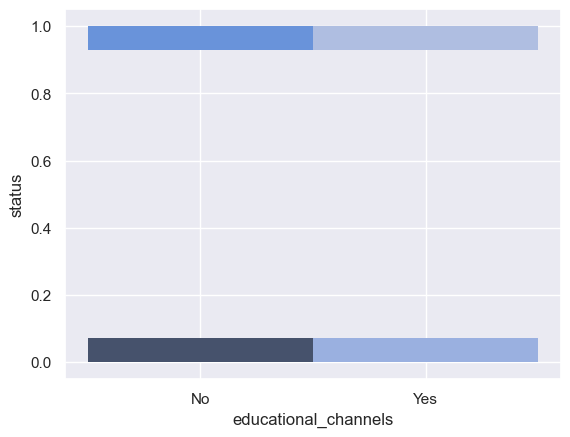

In [111]:
sns.histplot(data=df, x='educational_channels', y='status')
plt.show()

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


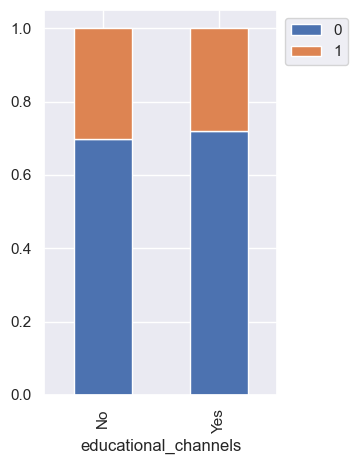

In [112]:
stacked_barplot(df, 'educational_channels', 'status')

In [113]:
df.groupby('referral')['status'].value_counts()

referral  status
No        0         3205
          1         1314
Yes       1           63
          0           30
Name: count, dtype: int64

In [114]:
print('Did not use referral: ', (1314)/(1314+3205))
print('Used referral: ', (63)/(63+30))

Did not use referral:  0.2907722947554769
Used referral:  0.6774193548387096


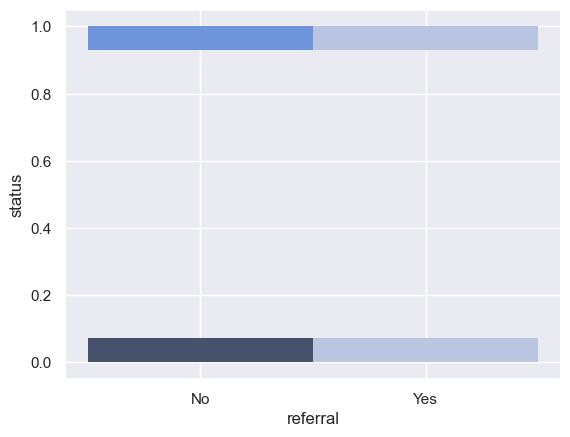

In [115]:
sns.histplot(data=df, x='referral', y='status')
plt.show()

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


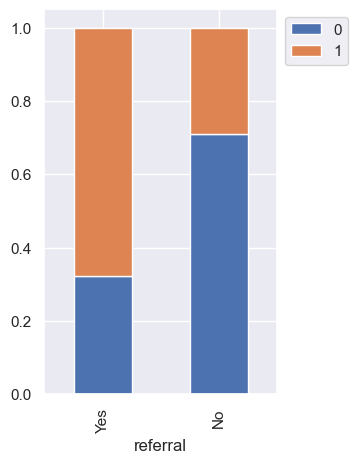

In [116]:
stacked_barplot(df, 'referral', 'status')

**Observations:**
- Every kind of channel besides the referrals had a conversion rate between 27-32%, which is not too significant, and they fall around the same range.
- When given a referral, however, **the conversion rate to a positive lead status shoots up to 67%.**
- Important to note that the referral channel had the least amount of inputs, as expected, but it's a significant decrease in total inputs.

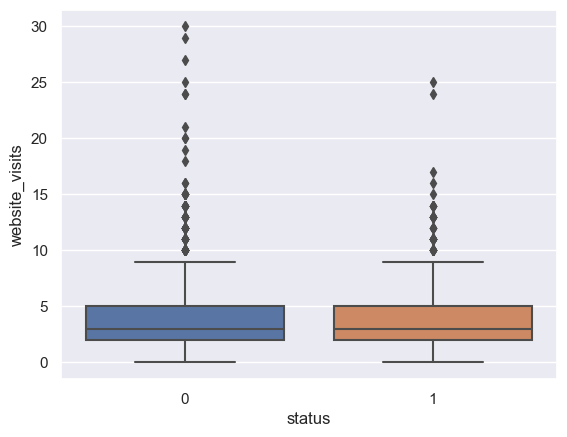

In [117]:
sns.boxplot(data=df, x='status', y='website_visits')
plt.show()

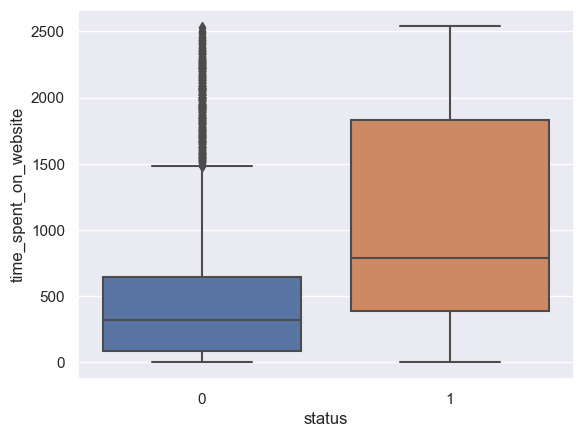

In [118]:
sns.boxplot(data=df, x='status', y='time_spent_on_website')
plt.show()

In [119]:
df.groupby('profile_completed')['status'].value_counts()

profile_completed  status
High               0         1318
                   1          946
Low                0           99
                   1            8
Medium             0         1818
                   1          423
Name: count, dtype: int64

In [120]:
print('High profile completion: ', (946)/(946+1318))
print('Medium profile completion: ', (423)/(423+1818))
print('Low profile completion: ', (8)/(8+99))

High profile completion:  0.4178445229681979
Medium profile completion:  0.18875502008032127
Low profile completion:  0.07476635514018691


status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


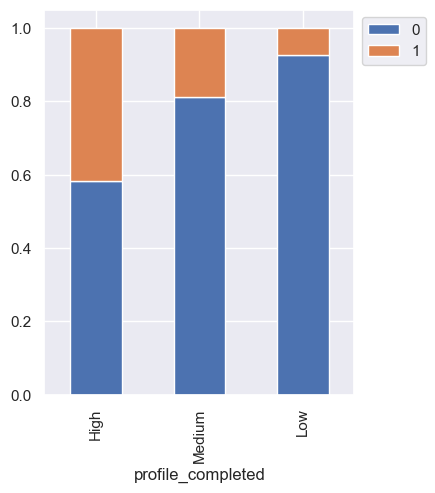

In [121]:
stacked_barplot(df, 'profile_completed', 'status')

**Observations:**
- There is a clear indication that **the higher the completion status, the more likely a conversion.**
- This also shows that **the lower the completion, the less likely there will be a positive lead status.**
- **Completion status is a good indicator of lead status.**

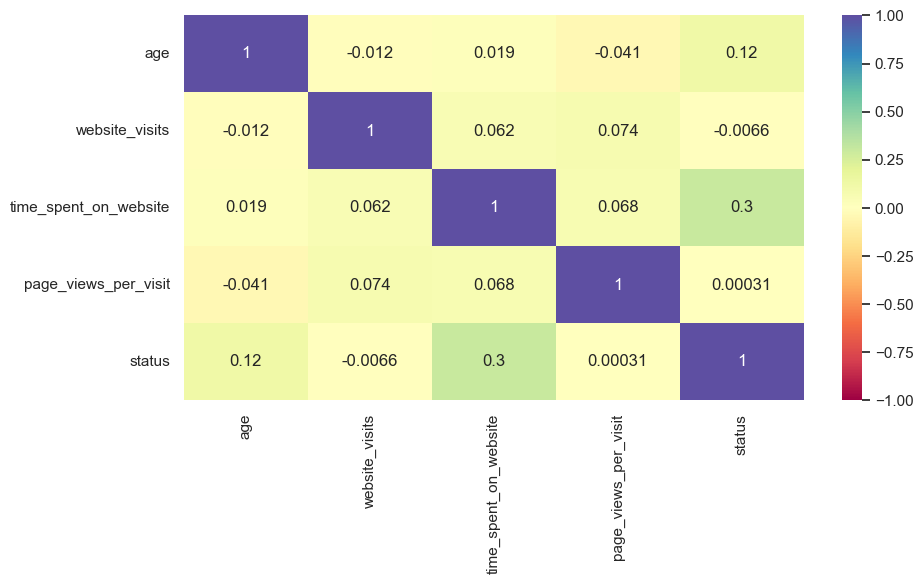

In [122]:
# Finding the correlation between various columns of the dataset
plt.figure(figsize=(10,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="Spectral", vmin=-1, vmax=1)
plt.show()

**Observation:**
- **There seem to be no correlation between each numerical category**, with the only two connections being over even 10% is status and age, and status and time spent. 

## Decision Tree model

In [123]:
# Creating dummy variables for the categorical columns
# drop_first=True is used to avoid redundant variables
df = pd.get_dummies(
    df,
    columns = df.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [124]:
# Separating independent variables and the target variable
x = df.drop('status',axis=1)

y = df['status'] 

In [125]:
# Splitting the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

In [126]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (3689, 16)
Shape of test set :  (923, 16)


In [127]:
# Function to compute different metrics to check performance of a classification model
def model_performance_classifier(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    acc = accuracy_score(target, pred)                # To compute accuracy
    recall = recall_score(target, pred)               # To compute recall
    precision = precision_score(target, pred)         # To compute precision
    f1 = f1_score(target, pred)

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1 Score": f1
        },
        index=[0],
    )

    return df_perf

In [128]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=1)

# Fitting the model
dt_classifier.fit(x_train, y_train)

# Model Performance on the test data, i.e., prediction
dt_classifier_perf_test = model_performance_classifier(dt_classifier, x_test, y_test)

dt_classifier_perf_test

,Accuracy,Recall,Precision,F1 Score
0,0.817985,0.697917,0.712766,0.705263


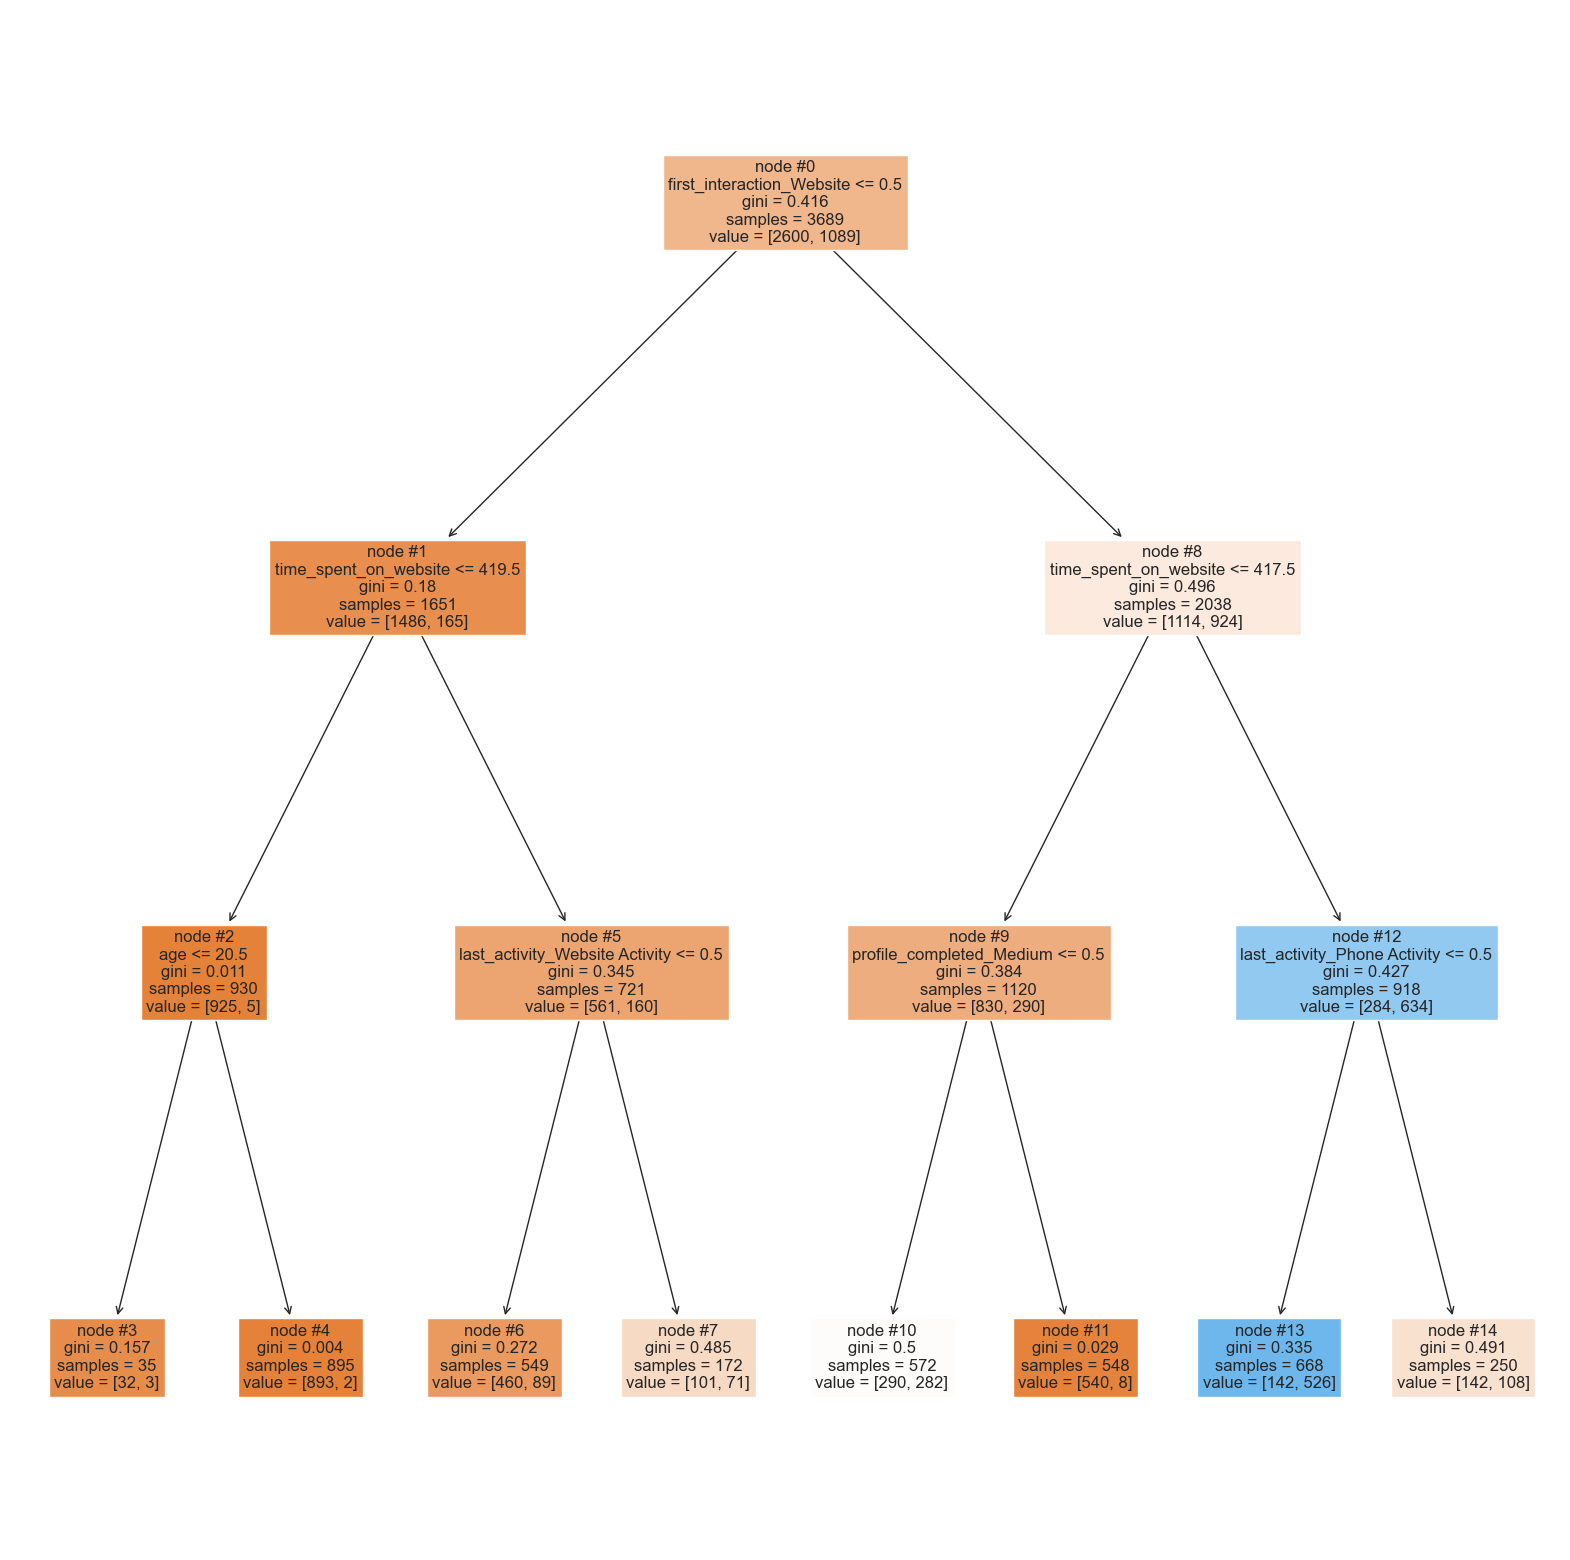

In [129]:
from sklearn import tree
features = list(x.columns)

# Building the model with max_depth=3
dt_classifier_visualize = DecisionTreeClassifier(random_state = 1, max_depth=3)

# Fitting the model
dt_classifier_visualize.fit(x_train, y_train)


plt.figure(figsize = (20, 20))
tree.plot_tree(dt_classifier_visualize, feature_names = features, filled = True, fontsize = 12, 
               node_ids = True)
plt.show()

In [130]:
print(tree.export_text(dt_classifier_visualize, feature_names=x_train.columns.tolist(), show_weights=True))

|--- first_interaction_Website <= 0.50
|   |--- time_spent_on_website <= 419.50
|   |   |--- age <= 20.50
|   |   |   |--- weights: [32.00, 3.00] class: 0
|   |   |--- age >  20.50
|   |   |   |--- weights: [893.00, 2.00] class: 0
|   |--- time_spent_on_website >  419.50
|   |   |--- last_activity_Website Activity <= 0.50
|   |   |   |--- weights: [460.00, 89.00] class: 0
|   |   |--- last_activity_Website Activity >  0.50
|   |   |   |--- weights: [101.00, 71.00] class: 0
|--- first_interaction_Website >  0.50
|   |--- time_spent_on_website <= 417.50
|   |   |--- profile_completed_Medium <= 0.50
|   |   |   |--- weights: [290.00, 282.00] class: 0
|   |   |--- profile_completed_Medium >  0.50
|   |   |   |--- weights: [540.00, 8.00] class: 0
|   |--- time_spent_on_website >  417.50
|   |   |--- last_activity_Phone Activity <= 0.50
|   |   |   |--- weights: [142.00, 526.00] class: 1
|   |   |--- last_activity_Phone Activity >  0.50
|   |   |   |--- weights: [142.00, 108.00] class: 0



**Observations:**
- **Root node:** The first node in the decision tree asks first_interaction_Website <= 0.5. This means the greatest amount of information is gained from the first interaction was from the website or not. It uses 0.5 as the border because a 0 would indicate a no, and a 1 indicates a yes.
- **Internal nodes:**
    - time_spent_on_website <= 419.5
    - time_spent_on_website <= 417.5 
    - age <= 20.5
    - last_activity_Website activity <= 0.5
    - profile_completed_Medium <= 0.5
    - last_activity_Phone activity <= 0.5
- **Lead nodes** are the nodes of the tree without any children. They indicate the lead status. For example, the first leaf node is reached if the first_interaction_Website > 0.5, time_spent_on_website > 419.50, age > 20.5, leading you to node #3. 

**Interpretations and conclusions:**
- The decision tree visualized is truncated and not fully shown to get a better summarization and interpretable image. 
- For this case, accuracy can be a good indicator of the effectiveness of the decision tree model. Since accuracy is at about 81%, that's decent. 
- If we care about not missing any possible lead statuses, then emphasizing recall could be important since we don't want to misclassify any possible positive leads. In this case, recall has about a 69% probability, which needs a bit of work. 
- Overall, it seems like pruning the tree could be a possible solution to try to optimize and get better results.
 

## Prune the Tree

Text(0, 0.5, 'total impurity of leaves')

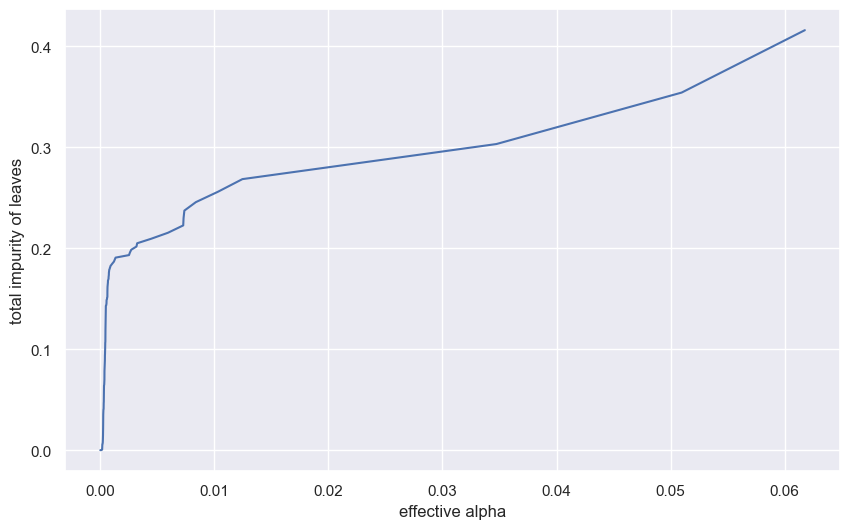

In [131]:
# To gather applicable alpha and impurity values
path = dt_classifier.cost_complexity_pruning_path(x_train, y_train)


ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [144]:
scores = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    score = np.mean(cross_val_score(clf, x_train, y_train, cv=5))
    scores.append(score)

# Select the alpha with the highest cross-validation score
best_alpha = ccp_alphas[np.argmax(scores)]


Text(0, 0.5, 'total depth')

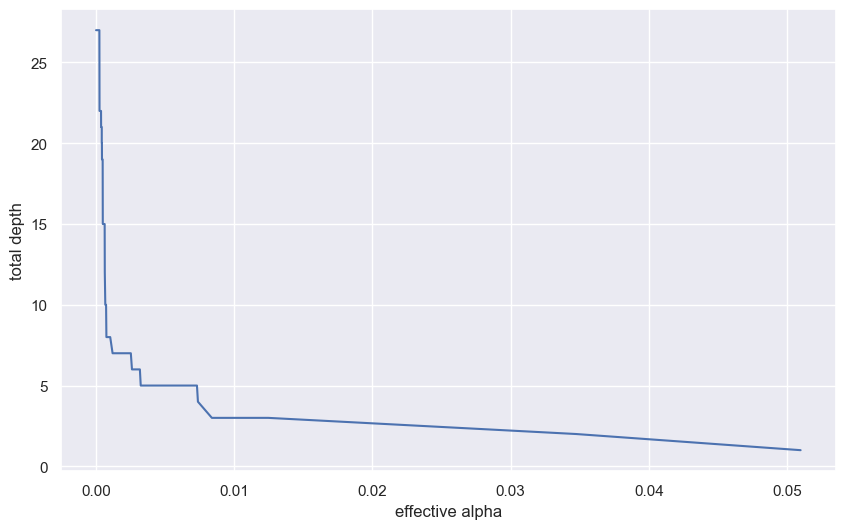

In [145]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Text(0, 0.5, 'Accuracy scores')

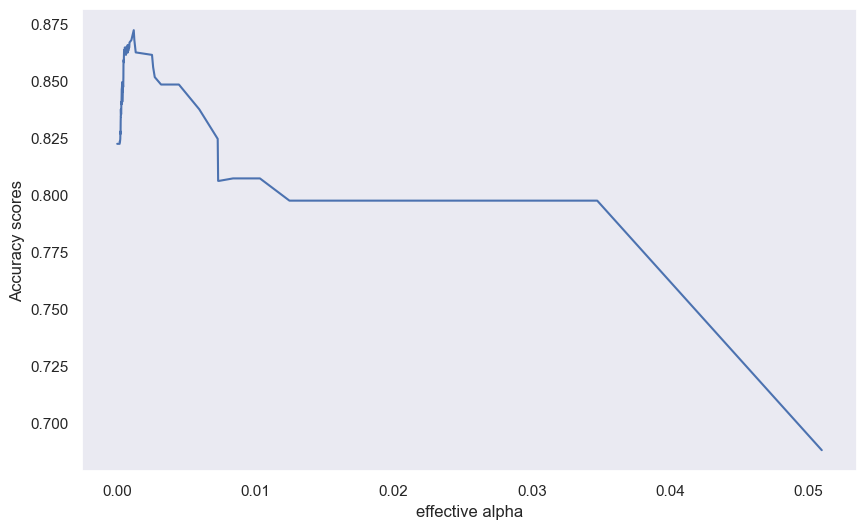

In [146]:
acc_scores = [accuracy_score(y_test, clf.predict(x_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

In [147]:
clf_pruned = DecisionTreeClassifier(random_state=1, ccp_alpha=best_alpha)
clf_pruned.fit(x_train, y_train)

# Model Performance on the test data, i.e., prediction
pruned_perf_test = model_performance_classifier(clf_pruned, x_test, y_test)

pruned_perf_test

,Accuracy,Recall,Precision,F1 Score
0,0.862405,0.6875,0.842553,0.75717


**Interpretations and conclusions:**
- Pruning increased accuracy by about 5%,  but lowered recall by 1%.
- The other measurement tools, I didn't discuss also rose, especially precision, so that could be a good sign if that was our focus.
- Just considering accuracy, this was a good decision, and since our decline in recall was minimal, I believe this was a positive adjustment.

## Random Forest model

In [184]:
# Random Forest Regressor
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 1)

# Fitting the model
rf_classifier.fit(x_train, y_train)

# Model Performance on the test data
rf_classifier_perf_test = model_performance_classifier(rf_classifier, x_test, y_test)

rf_classifier_perf_test

,Accuracy,Recall,Precision,F1 Score
0,0.868906,0.732639,0.827451,0.777164


## Tuning the Random Forest Model

In [185]:
rf_parameters = {
    'n_estimators': [100, 110, 120],
    'max_depth': [None, 5, 7],
    'max_features': [0.8, 1.]
}

In [186]:
rf_grid_obj = GridSearchCV(rf_classifier, rf_parameters, scoring = 'accuracy', cv=5)
rf_grid_obj.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [None, 5, 7], 'max_features': [0.8, 1.0],
                         'n_estimators': [100, 110, 120]},
             scoring='accuracy')

In [187]:
rf_tuned_classifier = rf_grid_obj.best_estimator_
rf_tuned_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, max_features=0.8, random_state=1)

In [188]:
rf_tuned_classifier_perf_test = model_performance_classifier(rf_tuned_classifier, x_test, y_test)
rf_tuned_classifier_perf_test

,Accuracy,Recall,Precision,F1 Score
0,0.868906,0.729167,0.83004,0.77634


In [189]:
models_test_comp_df = pd.concat(
    [
        dt_classifier_perf_test.T,
        pruned_perf_test.T,
        rf_classifier_perf_test.T,
        rf_tuned_classifier_perf_test.T
    ],
    axis=1
)

In [190]:
models_test_comp_df.columns = [
    'Decision tree classifier',
    'Pruned decision tree classifier',
    'Random forest classifier',
    'Tuned random forest classifier'
]
models_test_comp_df.T

,Accuracy,Recall,Precision,F1 Score
Decision tree classifier,0.817985,0.697917,0.712766,0.705263
Pruned decision tree classifier,0.862405,0.687500,0.842553,0.757170
Random forest classifier,0.868906,0.732639,0.827451,0.777164
Tuned random forest classifier,0.868906,0.729167,0.830040,0.776340


([<matplotlib.axis.YTick at 0x2a2935050>,
 [Text(0, 0, 'print_media_type2_Yes'),
  Text(0, 1, 'educational_channels_Yes'),
  Text(0, 2, 'digital_media_Yes'),
  Text(0, 3, 'print_media_type1_Yes'),
  Text(0, 4, 'referral_Yes'),
  Text(0, 5, 'website_visits'),
  Text(0, 6, 'profile_completed_Low'),
  Text(0, 7, 'last_activity_Website Activity'),
  Text(0, 8, 'current_occupation_Student'),
  Text(0, 9, 'page_views_per_visit'),
  Text(0, 10, 'last_activity_Phone Activity'),
  Text(0, 11, 'current_occupation_Unemployed'),
  Text(0, 12, 'age'),
  Text(0, 13, 'profile_completed_Medium'),
  Text(0, 14, 'first_interaction_Website'),
  Text(0, 15, 'time_spent_on_website')])

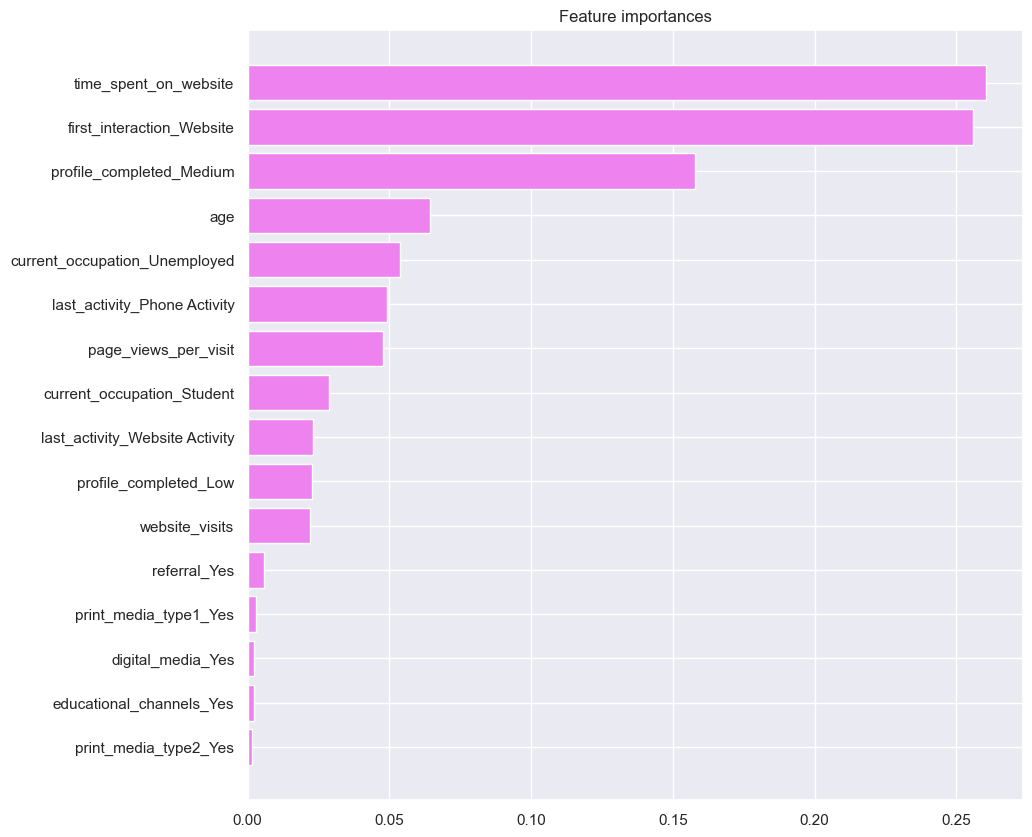

In [195]:
importances = rf_tuned_classifier.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,10))
plt.title('Feature importances')
plt.barh(range(len(features)), importances[indices], color = 'violet', align='center')
plt.yticks(range(len(features)), [features[i] for i in indices])

**Observations:**
- Unlike the decision tree model, the random forest model gives the most weight to time spent on the website rather than the first interaction. It still has the first interaction as an important feature (ranking second), but that's one clear difference.
- The three most important features for the random forest model are the time_spent_on_website, first_interaction_Website, and profile completed_Medium.

**Interpretations and Conclusion:**
- The tuned random forest model has the exact same accuracy as the initial random forest model, and every other statistical test were also comparable. Still, the tuned model was slightly worse in recall and F1 score, which is interesting. 
- Since both models are so comparable, either would be an ok choice, but if I had to choose, I would use the untuned model (the first random forest) since it had better results in accuracy, which we care most about, and recall which is another measure that we might consider more important.

## Actionable Insights and Recommendations

- The two most important features for understanding if someone will become a paying customer are the time_spent_on_website and their first_interaction.
- The other feature that has the third most importance is profile completion.
- Another feature that doesn't show to have as much impact in the models is referrals. The reason referrals aren't a significant part of each model is because there aren't enough people who've been given referrals. And while there weren't many referrals being given out, when there were, it had a 67% sign of paying customers. This means it may be good to look into how to increase the amount of referrals being given.
- Another thing to look into is your customer service, or more specifically how phone calls are made. When a phone call is the latest interaction there is a less than 20% conversion rate to paying customers, and every other measurement was much closer to 50%. While it may not be a problem with customer service, it is something that could possibly be looked into.
- The most suitable classifier is the random forest classifier which had an accuracy of about 86%.